## первый

In [57]:
from sklearn.datasets import load_wine
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
wine_dataset = load_wine()

### Изучение данных

In [2]:
len(wine_dataset['feature_names'])
print("Ключи digits_dataset: \n{}\n".format(wine_dataset.keys()))
print(wine_dataset['DESCR']+"\n")
print("Названия ответов: {}\n".format(wine_dataset['target_names']))
print("Названия признаков: \n{}\n".format(wine_dataset['feature_names']))
print("Форма массива data: \n{}\n".format(wine_dataset['data'].shape))
print("Первые 10 строк массива data: \n{}\n".format(wine_dataset['data'][:10]))
print("Форма массива target: \n{}\n".format(wine_dataset['target'].shape))
print("Ответы (первые сто): \n{}".format(wine_dataset['target'][:100]))


Ключи digits_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:           

### Разделение данных на обучающие и тестовые наборы

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine_dataset['data'], wine_dataset['target'],
                                                    random_state=0)

In [4]:
# обзор размера разделенных данных
print("Форма массива X_train: {}".format(X_train.shape))
print("Форма массива y_train: {}".format(y_train.shape))
print("Форма массива X_test: {}".format(X_test.shape))
print("Форма массива y_test: {}".format(y_test.shape))

Форма массива X_train: (133, 13)
Форма массива y_train: (133,)
Форма массива X_test: (45, 13)
Форма массива y_test: (45,)


### Исследовать данные с помощью визуализации

<Figure size 640x480 with 0 Axes>

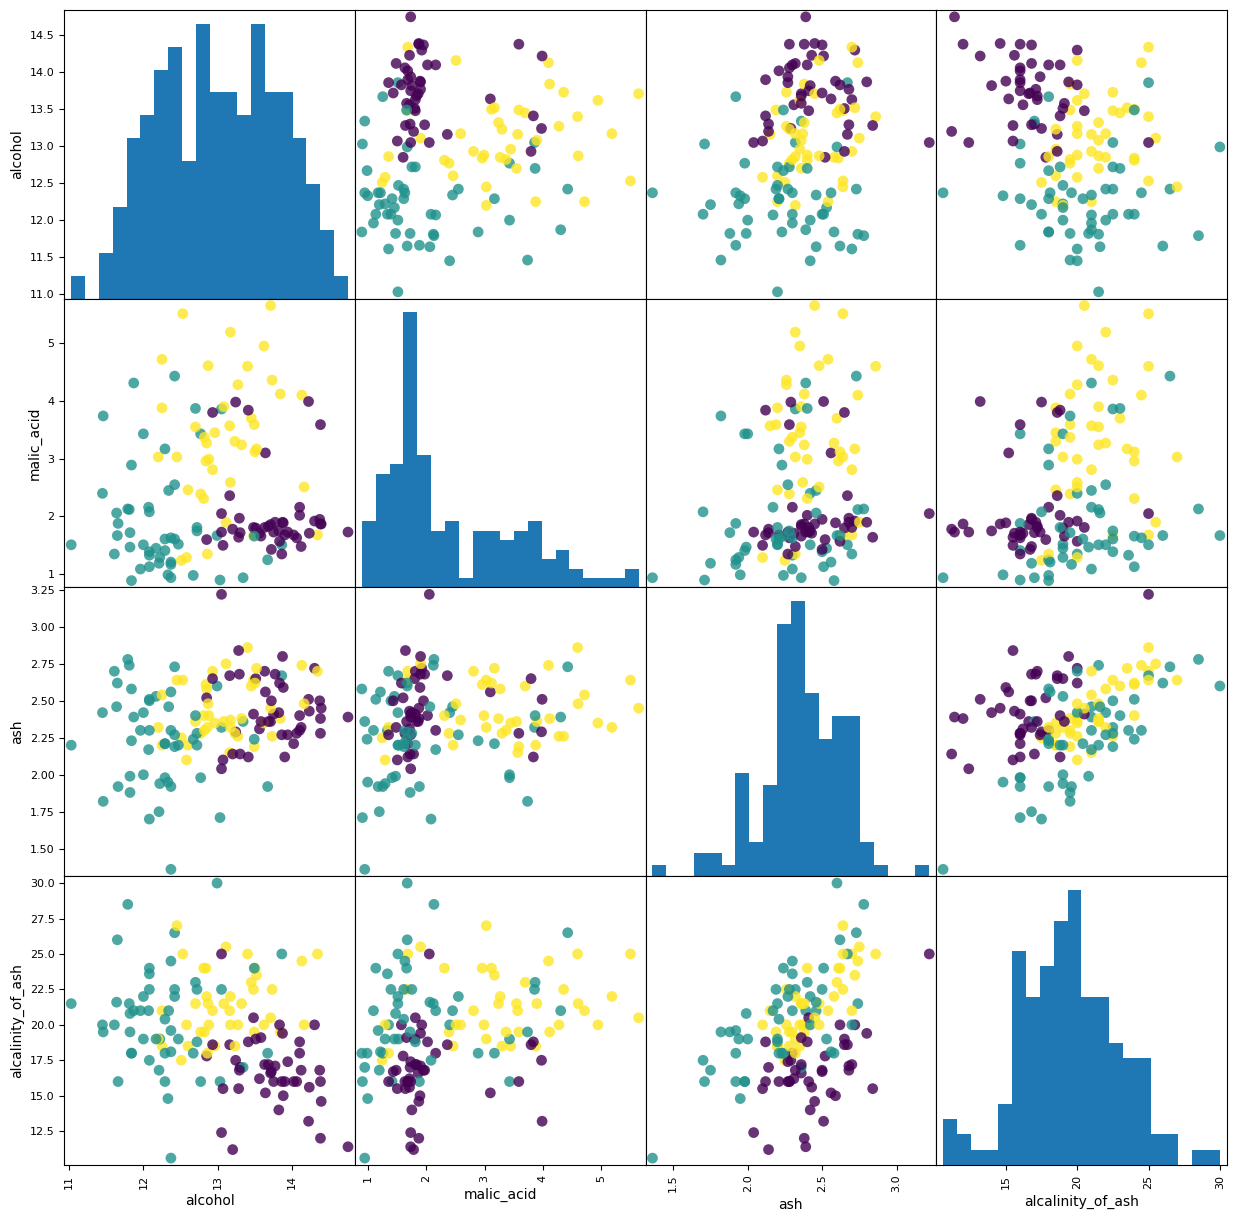

In [8]:
# Визуализация всех возможных пар признаков с помощью диаграмы рассеяния
# Гистограмма не очень читаема при всех признаках,
# поэтому я вывел только первые четыре признака
plt.figure()
# создаем dataframe из данных в массиве X_train
# маркируем столбцы, используя строки в wine_dataset.features_names
wine_dataframe = pd.DataFrame(X_train[:,:4], columns=wine_dataset.feature_names[:4])
# создаем таблицу рассеяния из dataframe, цвет точек задаем с помощью y_train
grr = pd.plotting.scatter_matrix(wine_dataframe, c=y_train, figsize=(15,15), marker='o',
                                 hist_kwds={'bins':20}, s=60, alpha=.8)

In [56]:
# метод k-средних.
from sklearn.neighbors import KNeighborsClassifier

In [55]:
# Здесь я решил вывести прогнозы с 30 соседями
# Локальный максимум 80%
# Точность скакала, пока после 22 не начала колебаться между 78 и 80%
# Пик - 80%

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    # помещяем тренировочные модели для классификации
    knn.fit(X_train, y_train)
    
    # тестируем нашу модель
    y_pred = knn.predict(X_test)
    print("Прогнозы для тестового набора (кол. соседей: {}): \n{}".format(i,y_pred))

    # Проверка точности обученной модели
    print("Правильность на текстовом наборе: {:.2f} %".format(np.mean(y_pred == y_test)))
    print("Правильность на текстовом наборе: {:.2f} %\n".format(knn.score(X_test, y_test)))

Прогнозы для тестового набора (кол. соседей: 1): 
[0 1 1 0 1 1 0 2 1 1 0 1 0 2 1 1 0 0 1 0 1 0 1 1 0 1 1 1 2 2 0 0 2 0 0 0 2
 1 1 1 2 0 1 1 1]
Правильность на текстовом наборе: 0.76 %
Правильность на текстовом наборе: 0.76 %

Прогнозы для тестового набора (кол. соседей: 2): 
[0 1 1 0 1 1 0 1 1 1 0 1 0 2 1 1 0 0 1 0 1 0 1 1 0 1 1 1 2 2 0 0 1 0 0 0 0
 1 1 1 2 0 1 1 1]
Правильность на текстовом наборе: 0.73 %
Правильность на текстовом наборе: 0.73 %

Прогнозы для тестового набора (кол. соседей: 3): 
[0 1 1 0 1 1 0 1 1 1 0 1 0 2 0 1 0 0 1 0 1 0 1 1 0 1 1 1 2 2 0 0 1 0 0 0 0
 1 1 0 2 0 1 1 1]
Правильность на текстовом наборе: 0.73 %
Правильность на текстовом наборе: 0.73 %

Прогнозы для тестового набора (кол. соседей: 4): 
[0 1 1 0 1 1 0 1 1 1 0 1 0 2 0 1 0 0 1 0 1 0 1 1 1 1 1 1 2 2 0 0 1 0 0 1 2
 1 1 2 2 0 1 1 1]
Правильность на текстовом наборе: 0.78 %
Правильность на текстовом наборе: 0.78 %

Прогнозы для тестового набора (кол. соседей: 5): 
[0 1 1 0 1 1 0 2 1 1 0 1 0 2 0 1 0 0 1 0 1 0 1